# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [106]:
#your imports (only use libraries provided in the environment)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from p_decision_tree.DecisionTree import DecisionTree
import pydotplus
import networkx
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from tabulate import tabulate
import time

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [107]:
# Your answer goes here

df_original=pd.read_csv("AirBnB_original.csv")  #read the dataset
df_original.head()  #print the first 5 rows of the dataset

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [108]:
# Your answer goes here

df_NaN=df_original.dropna(axis=0, how='any', inplace=False)  #the row is removed from the dataframe if there is at least 1 NaN
print("{} rows have been removed.".format(df_original.shape[0]-df_NaN.shape[0]))  #calculate the number of rows that have been removed


1477 rows have been removed.


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [109]:
# Your answer goes here

df_uniqueid=df_NaN.drop_duplicates(subset="id",keep='first',inplace=False)  #identify duplicates from "id"
print("{} duplicates are removed.".format(df_NaN.shape[0]-df_uniqueid.shape[0]))  #calculate the number of duplicated rows

389 duplicates are removed.


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [110]:
# Your answer goes here

df_cleaned=pd.read_csv("AirBnB_cleaned.csv")
print("The arerage price is about {:.2f}".format(np.mean(df_cleaned['price'])))  #calculate the average price, keep only 2 digits after decimal
print("The first quantile is about {:.2f}".format(np.quantile(df_cleaned['price'],0.25)))  #calculate the first quantiles, keep only 2 digits after decimal
print("The third quantile is about {:.2f}".format(np.quantile(df_cleaned['price'],0.75)))  #calculate the third quantiles, keep only 2 digits after decimal
print("The standard deviation is about {:.2f}".format(np.std(df_cleaned['price'])))  #calculate the standard deviation, keep only 2 digits after decimal

The arerage price is about 625.46
The first quantile is about 340.00
The third quantile is about 913.00
The standard deviation is about 331.23


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

After shifting the origin:


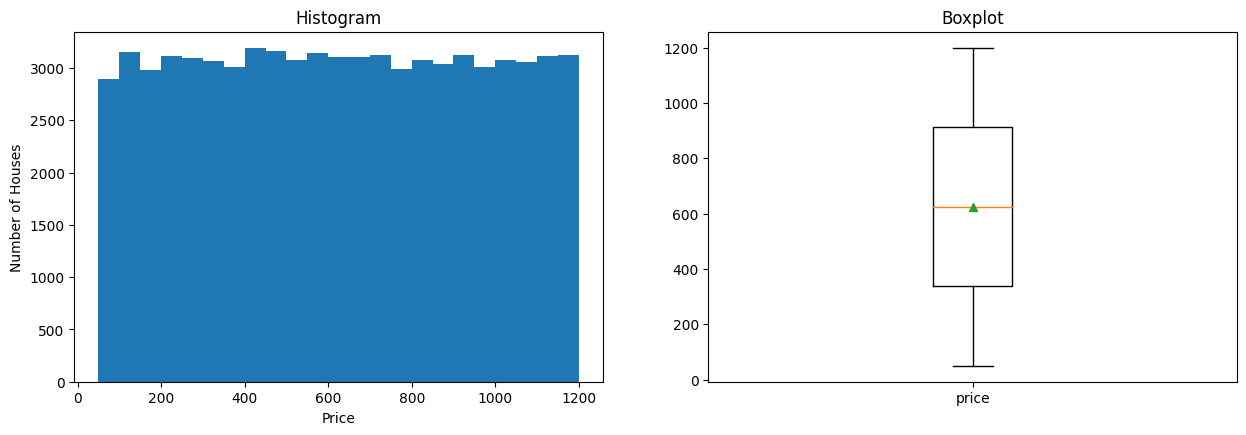

After shifting the origin:


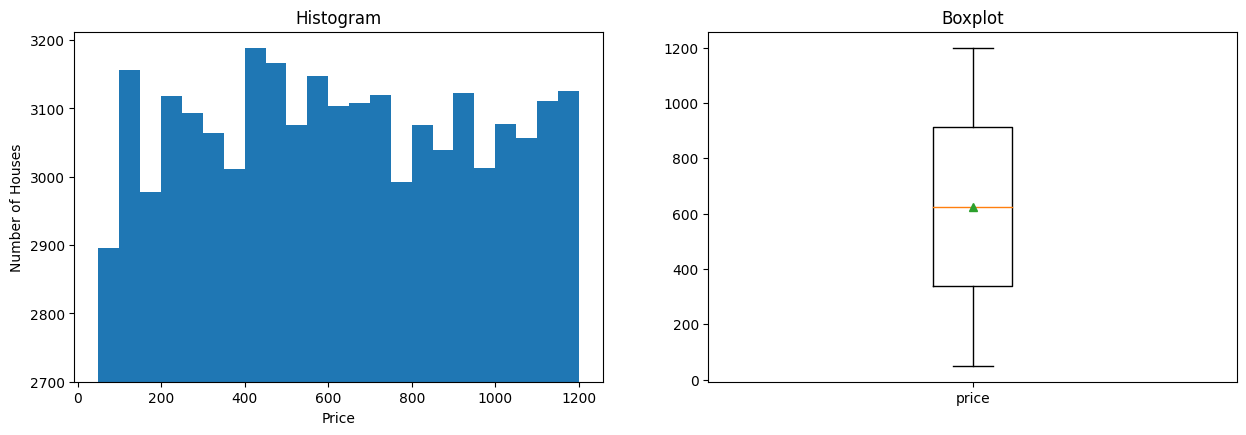

In [153]:
# Your answer goes here

# We firstly draw the histogram directly, but the number of houses for each price bin is high, and we can not see the difference clearly.
# Therefore, we change the starting point of y-axis to 2700 afterwards.
def plot(cut=False):
    print("After shifting the origin:")
    plt.figure(figsize=(15, 10))
    plt.subplot(2,2,1)
    #draw the histogram, first minus 2700 from the number of houses for each price bin, and then set the starting point of y-axis to 2700
    if cut == 0:
        global hist_return
        hist_return=plt.hist(df_cleaned["price"],bins=23)
    else:
        plt.bar(np.arange(75,1200,50),np.array(hist_return[0]-2700),width=50,bottom=2700)
    plt.title("Histogram")
    plt.xlabel("Price")
    plt.ylabel("Number of Houses")
    plt.subplot(2,2,2)
    plt.boxplot(df_cleaned["price"],labels={"price"},showmeans=True) #draw the box plot
    plt.title("Boxplot")
    plt.show()

plot(cut=False) 
# draw the histogram, hist_return is the number of houses for each price bin, we will later use it for changing the starting point of y-axis
plot(cut=True) 
# draw the histogram, first minus 2700 from the number of houses for each price bin, and then set the starting point of y-axis to 2700


# print("Before shifting the origin:")
# plt.figure(figsize=(15, 10))
# plt.subplot(2,2,1)
# #draw the histogram, hist_return is the number of houses for each price bin, we will later use it for changing the starting point of y-axis
# hist_return=plt.hist(df_cleaned["price"],bins=23)  
# plt.title("Histogram")
# plt.xlabel("Price")
# plt.ylabel("Number of Houses")
# plt.subplot(2,2,2)
# plt.boxplot(df_cleaned["price"],labels={"price"},showmeans=True)  #draw the box plot
# plt.title("Boxplot")
# plt.show()



# print("After shifting the origin:")
# plt.figure(figsize=(15, 10))
# plt.subplot(2,2,1)
# #draw the histogram, first minus 2700 from the number of houses for each price bin, and then set the starting point of y-axis to 2700
# plt.bar(np.arange(75,1200,50),np.array(hist_return[0]-2700),width=50,bottom=2700) 
# plt.title("Histogram")
# plt.xlabel("Price")
# plt.ylabel("Number of Houses")
# plt.subplot(2,2,2)
# plt.boxplot(df_cleaned["price"],labels={"price"},showmeans=True) #draw the box plot
# plt.title("Boxplot")
# plt.show()


### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

id, host id and country are firstly ruled out, for the reason that id and host id will not impact the price and country is a redundant information since we already have country code.


as for 'neighborhood group':


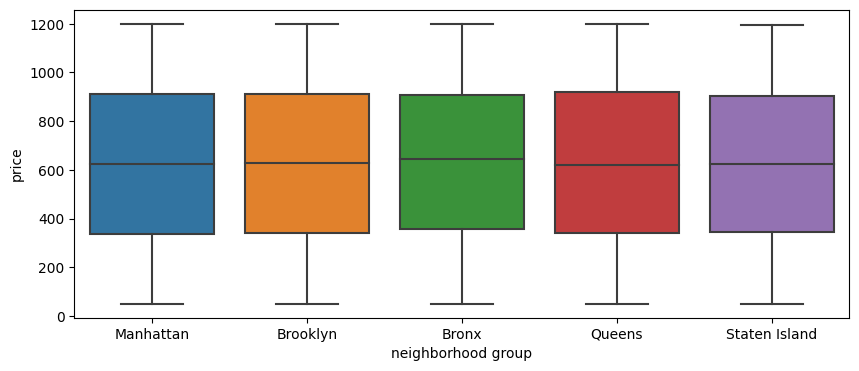

There seems to be no obvious relationship between neighborhood group and price.

as for 'neighborhood':


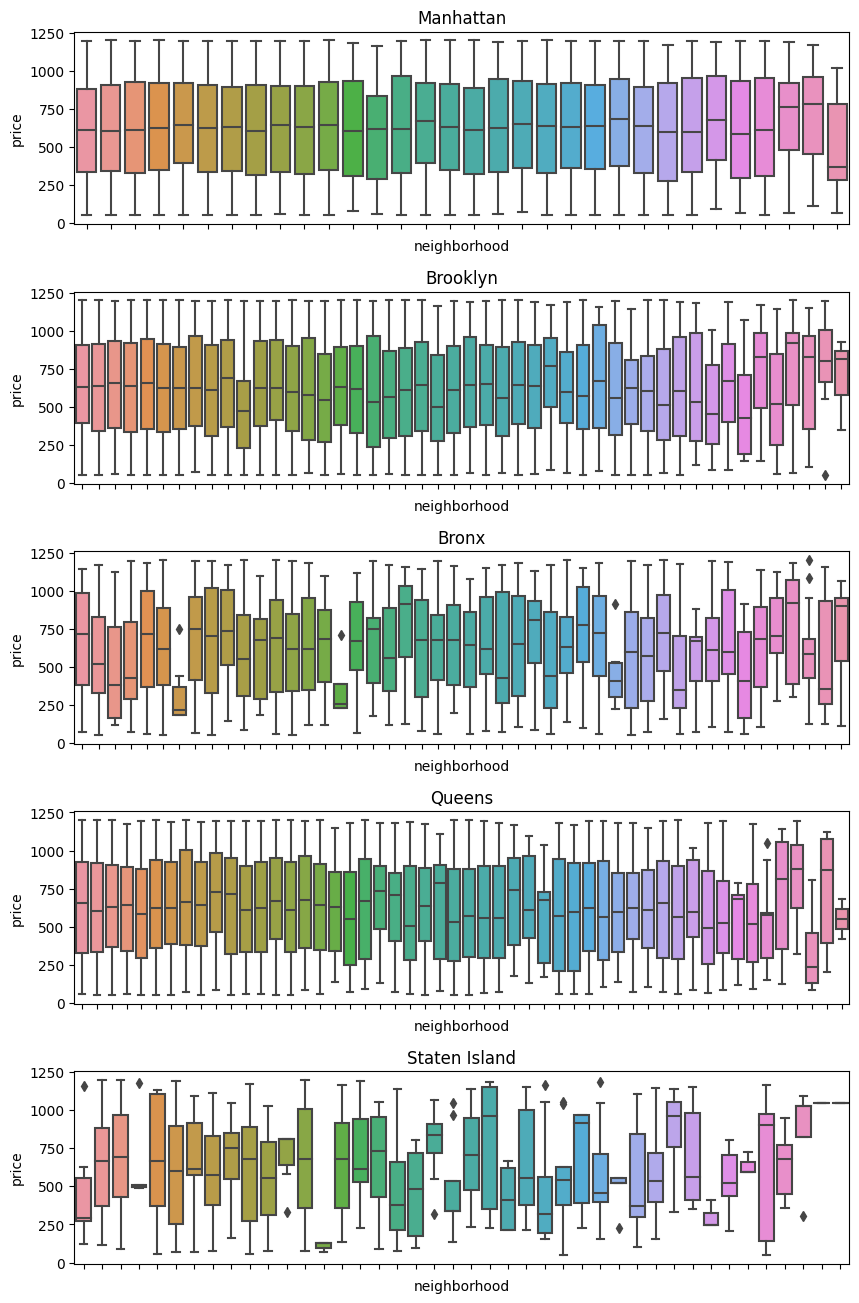

There seem to be some difference between each neighborhood. But for some neighborhood, there only exist a small numberof houses belong to those neighborhood. We believe this is an useable feature, but the data need to be filtered, only keepingthose neighborhoods that have a lot of support.

as for 'latitude' and 'longitude':


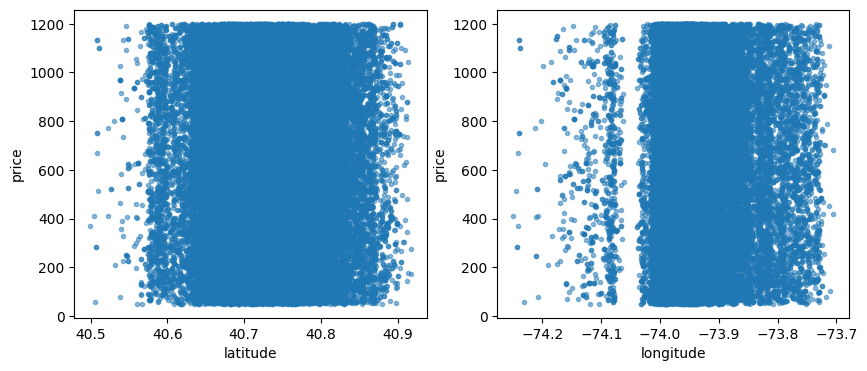

According to the graph, both latitude and longitude do not show an obvious relationship with price, so we do not use these feature.

as for 'country code':
There is only one kind of country code (US) existed in the dataframe. This feature will therefore not contribute anything to our model and we do not use it.

as for 'instant bookable':
There is only one kind of instant bookable status (0) existed in the dataframe. This feature will therefore not contribute anything to our model and we do not use it.

as for 'cancellation policy' and 'room type':


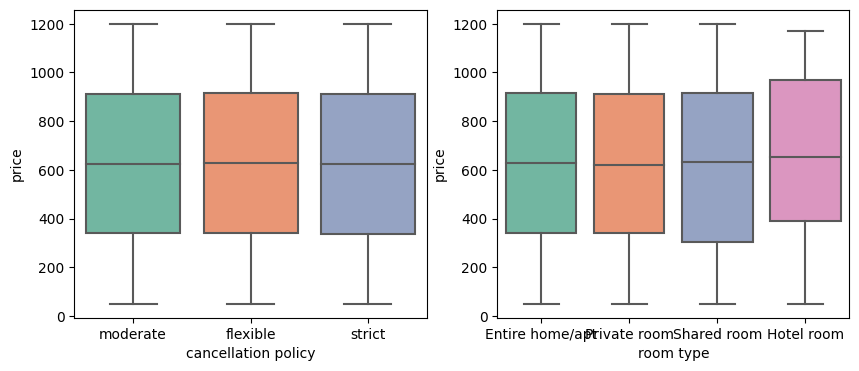

as for 'construction year':


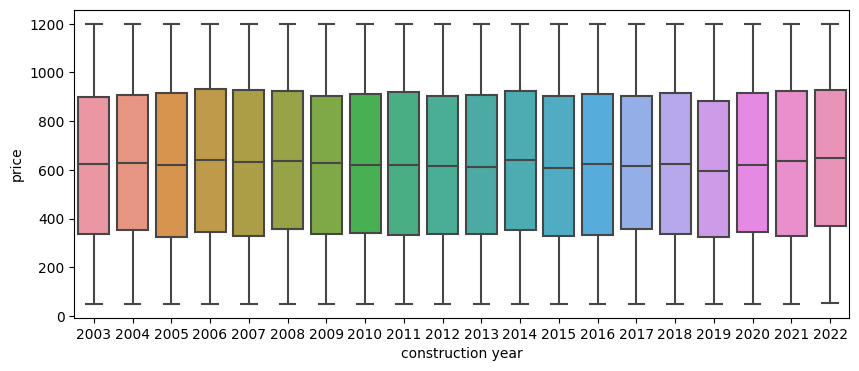

There seems to be no obvious relationship between construction year and price.

as for 'service fee':


<Figure size 640x480 with 0 Axes>

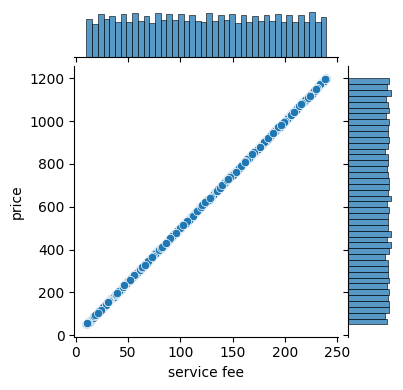

As we can see from the graph, there is a clearly postive correlation between number of rooms and price.

as for 'minimum nights':


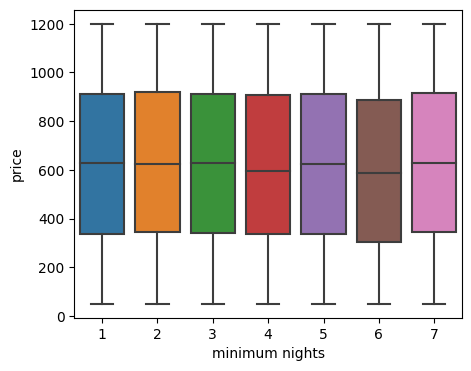

There seems to be no obvious relationship between minimum nights and price.

as for 'number of reviews':
Since the number of reviews of each houses is ranging from 0 to approximately 1500 and we can not plot the price box for each number of the reviews,we firstly devided the number of reviews into 10 bins, and use box plot to see the relationship between number of reviews and price.



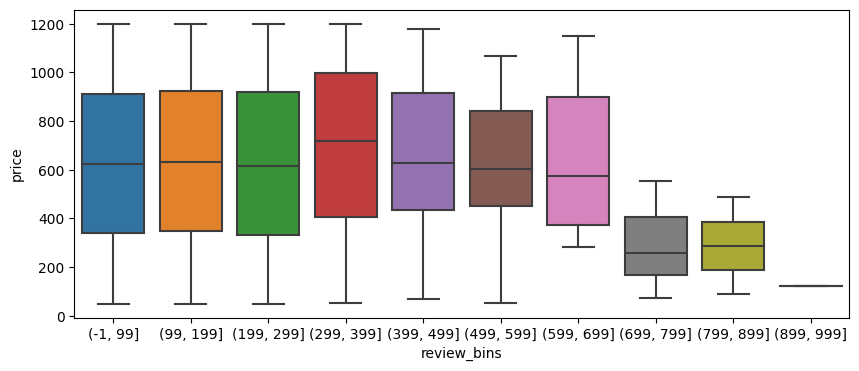

as for 'review rate number':


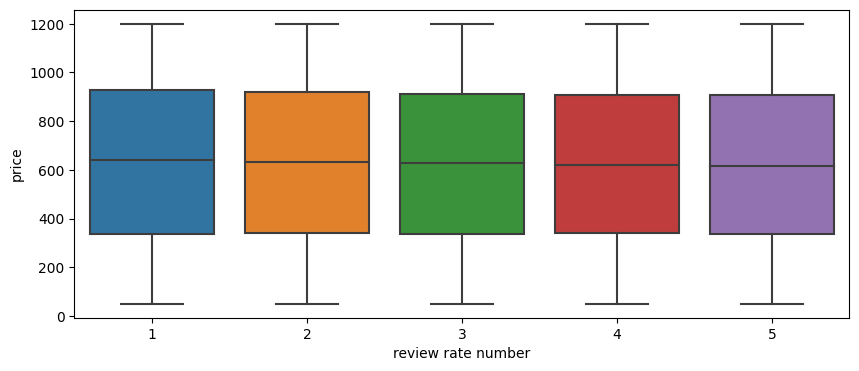

There seems to be no obvious relationship between review rate number and price.

as for 'calculated host listings count':


<Figure size 640x480 with 0 Axes>

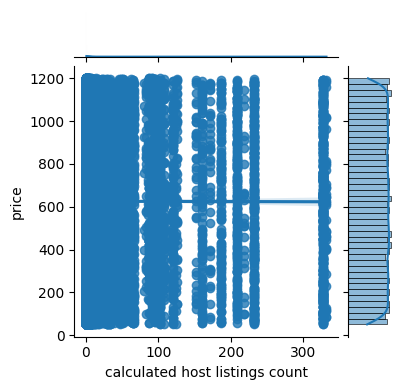

As wee can see from the joint plot, the most hosts in the dataframe only has a small number of listing houses.As we further calculated from the dataframe, there there are only 9.4% instaces with listing count >10. Therefore, we again drew a box plot with listing count ranging from 1 to 9 to see if there is any relationship.


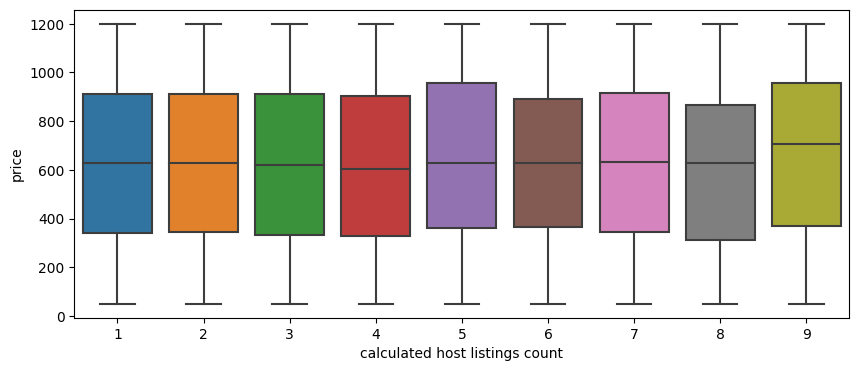

There seems to be no obvious relationship between calculated host listings count and price.

as for 'number rooms':


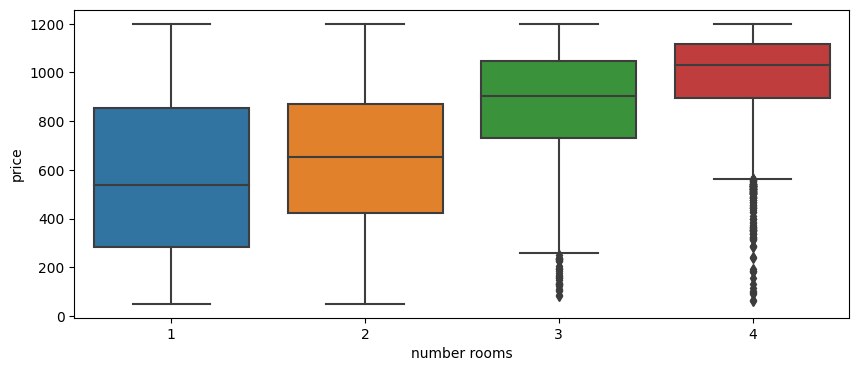

As we can see from the graph, there is a clearly postive correlation between number of rooms and price.



In [114]:
# Your answer goes here



print("\033[1;34mid, host id and country are firstly ruled out, for the reason that id and host id will not "\
      "impact the price and country is a redundant information since we already have country code.\n\n\033[0m")


#neighborhood group
print("\033[1;34mas for 'neighborhood group':\033[0m")
plt.figure(figsize=[10,4])
sns.boxplot(x="neighborhood group", y="price",data=df_cleaned)
plt.show()
print("There seems to be no obvious relationship between neighborhood group and price.\n")

#neighborhood
# neighbor=df_cleaned.groupby(["neighborhood group", "neighborhood"],as_index=False)['price'].mean()
# neighbor["count"]=df_cleaned.groupby(["neighborhood group", "neighborhood"],as_index=False)["price"].count()["price"]
print("\033[1;34mas for 'neighborhood':\033[0m")
f=plt.figure(figsize=[10,16])
f.subplots_adjust(hspace=0.35) # adjust the space between subplots to avoid the overlap between xlabel and title.
nei_group=df_cleaned["neighborhood group"].unique()
for i in range(5):
    f.add_subplot(5,1,i+1)
    p=sns.boxplot(x="neighborhood", y="price",data=df_cleaned[(df_cleaned["neighborhood group"]==nei_group[i])])
    p.set_title(nei_group[i])
    p.set_xticklabels(labels = [])
plt.show()
print("There seem to be some difference between each neighborhood. But for some neighborhood, there only exist a small number"\
      "of houses belong to those neighborhood. We believe this is an useable feature, but the data need to be filtered, only keeping"\
      "those neighborhoods that have a lot of support.\n")


#latitude and longitude
print("\033[1;34mas for 'latitude' and 'longitude':\033[0m")
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.scatter(df_cleaned["lat"],df_cleaned["price"],marker=".",alpha=0.5)  # plot the relation between latitude and price using scatter plot
plt.xlabel("latitude")
plt.ylabel("price")
plt.subplot(1,2,2)
plt.scatter(df_cleaned["long"],df_cleaned["price"],marker=".",alpha=0.5)  # plot the relation between longitude and price using scatter plot
plt.xlabel("longitude")
plt.ylabel("price")
plt.show()
print("According to the graph, both latitude and longitude do not show an obvious relationship with price, so we do not use these feature.\n")

#country code
print("\033[1;34mas for 'country code':\033[0m")
print("There is only one kind of country code ({0}) existed in the dataframe. This feature will therefore not contribute anything to our model and we do not use it.\n".format(df_cleaned['country code'].unique()[0]))


#instant bookable
print("\033[1;34mas for 'instant bookable':\033[0m")
print("There is only one kind of instant bookable status ({0}) existed in the dataframe. This feature will therefore not contribute anything to our model and we do not use it.\n".format(df_cleaned['instant bookable'].unique()[0]))


print("\033[1;34mas for 'cancellation policy' and 'room type':\033[0m")
f=plt.figure(figsize=[10,4])
f.add_subplot(1,2,1)
sns.boxplot(x="cancellation policy", y="price", data=df_cleaned,palette="Set2")  # plot the relation between cancellation policy and price using box plot
f.add_subplot(1,2,2)
sns.boxplot(x="room type", y="price", data=df_cleaned,palette="Set2")  # plot the relation between room type and price using box plot
plt.show()

#construction year
print("\033[1;34mas for 'construction year':\033[0m")
plt.figure(figsize=[10,4])
sns.boxplot(x="construction year", y="price", data=df_cleaned) # plot the relation between construction year and price using box plot
plt.show()
print("There seems to be no obvious relationship between construction year and price.\n")

#service fee
print("\033[1;34mas for 'service fee':\033[0m")
plt.figure()
sns.jointplot(data=df_cleaned, x="service fee", y="price", kind="scatter",height=4) # plot the relation between service fee and price using box plot
plt.show()
print("As we can see from the graph, there is a clearly postive correlation between number of rooms and price.\n")

#minimum nights
print("\033[1;34mas for 'minimum nights':\033[0m")
plt.figure(figsize=[5,4])
sns.boxplot(x="minimum nights", y="price", data=df_cleaned)  # plot the relation between minimum nights and price using box plot
plt.show()
print("There seems to be no obvious relationship between minimum nights and price.\n")


#number of reviews
print("\033[1;34mas for 'number of reviews':\033[0m")
print("Since the number of reviews of each houses is ranging from 0 to approximately 1500 and we can not plot the price "\
      "box for each number of the reviews,we firstly devided the number of reviews into 10 bins, and use box plot to see the"\
     " relationship between number of reviews and price.\n")
bins =np.arange(-1,1050,100)  # devide the number of reviews into 10 bins
reviews_cut=pd.cut(df_cleaned["number of reviews"],bins)  #According to the number of reviews, place each house in the corresponding bin
reviews_merge=pd.DataFrame({'review_bins':reviews_cut, 'price':df_cleaned.price})  #construct a dataframe consisting of review_bin and price
plt.figure(figsize=[10,4])
sns.boxplot(x="review_bins", y="price", data=reviews_merge)
plt.show()


#review rate number
print("\033[1;34mas for 'review rate number':\033[0m")
plt.figure(figsize=[10,4])
sns.boxplot(x="review rate number", y="price", data=df_cleaned)
plt.show()
print("There seems to be no obvious relationship between review rate number and price.\n")

#calculated host listings count
print("\033[1;34mas for 'calculated host listings count':\033[0m")
plt.figure()
# plot the relation between calculated host listings count and price using joint plot, try to add a linear regression fit.
sns.jointplot(x="calculated host listings count", y="price", data=df_cleaned, kind="reg",height=4); 
plt.show()


print("As wee can see from the joint plot, the most hosts in the dataframe only has a small number "\
      "of listing houses.As we further calculated from the dataframe, there there are only {:.1%} "\
      "instaces with listing count >10. Therefore, we again drew a box plot with listing count ranging from 1 to 9 "\
      "to see if there is any relationship.".format(len(df_cleaned[df_cleaned["calculated host listings count"]>10])/len(df_cleaned)))
plt.figure(figsize=[10,4])
sns.boxplot(x="calculated host listings count", y="price",data=df_cleaned[df_cleaned["calculated host listings count"]<10])
plt.show()
print("There seems to be no obvious relationship between calculated host listings count and price.\n")

#number rooms
print("\033[1;34mas for 'number rooms':\033[0m")
plt.figure(figsize=[10,4])
sns.boxplot(x="number rooms", y="price",data=df_cleaned)
plt.show()
print("As we can see from the graph, there is a clearly postive correlation between number of rooms and price.\n")



_Answer:_ 

To summarize the above findings:
1. "id" and "host id" are firstly ruled out because they would not impact the pricing decision.
2. "country" is firstly ruled out because it is a redundant information as we already as country code.
3. "country code" and "instant bookable" are dropped out because the variances are 0 (each of them only contains one kind of value), and therefore, would not contribute anything to our model.
4. "latitude", "longitude", "cancellation policy", "construction year", "minimum nights", "review rate number", "calculated host listing count" and "neighborhood group" are dropped out because according to the figures, they do not seem to have a obvious relationship with price decision.
5. "room type", "number rooms", "number of reviews", "service fee" and "neighborhood" are taken into consideration since they seem to have some kind of correlation with price.

### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

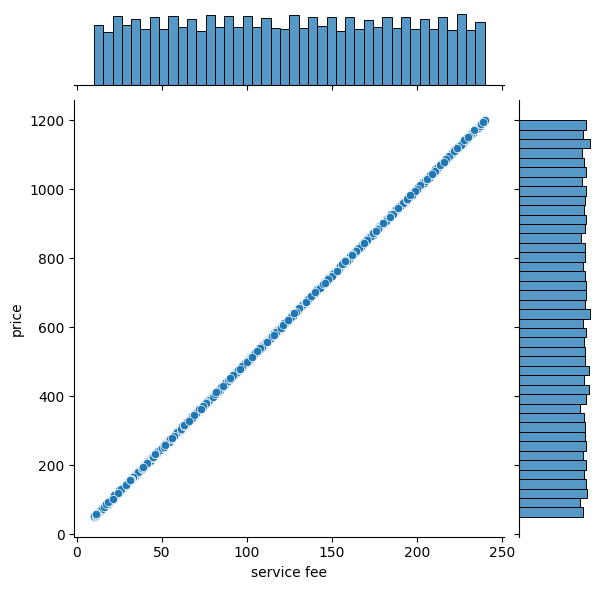

In [115]:
# Your answer goes here
scatter = sns.jointplot(data=df_cleaned, x="service fee", y="price", kind="scatter")

_Answer:_

It seems to be a helpful feature for pricing decision since there is a clear positive correlation between service fee and price.


Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

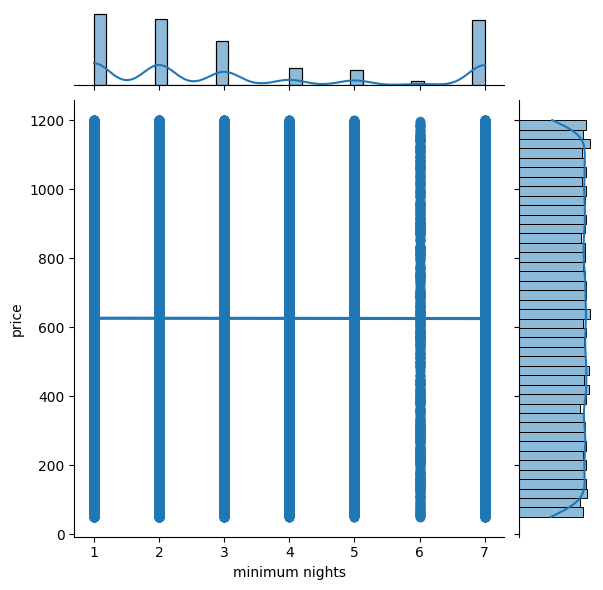

In [9]:
# Your answer goes here
sns.jointplot(x="minimum nights", y="price", data=df_cleaned, kind="reg"); 

_Answer:_

There seems to be no obvious relationship between "minimum nights" and "price"

To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

<AxesSubplot:xlabel='number rooms', ylabel='price'>

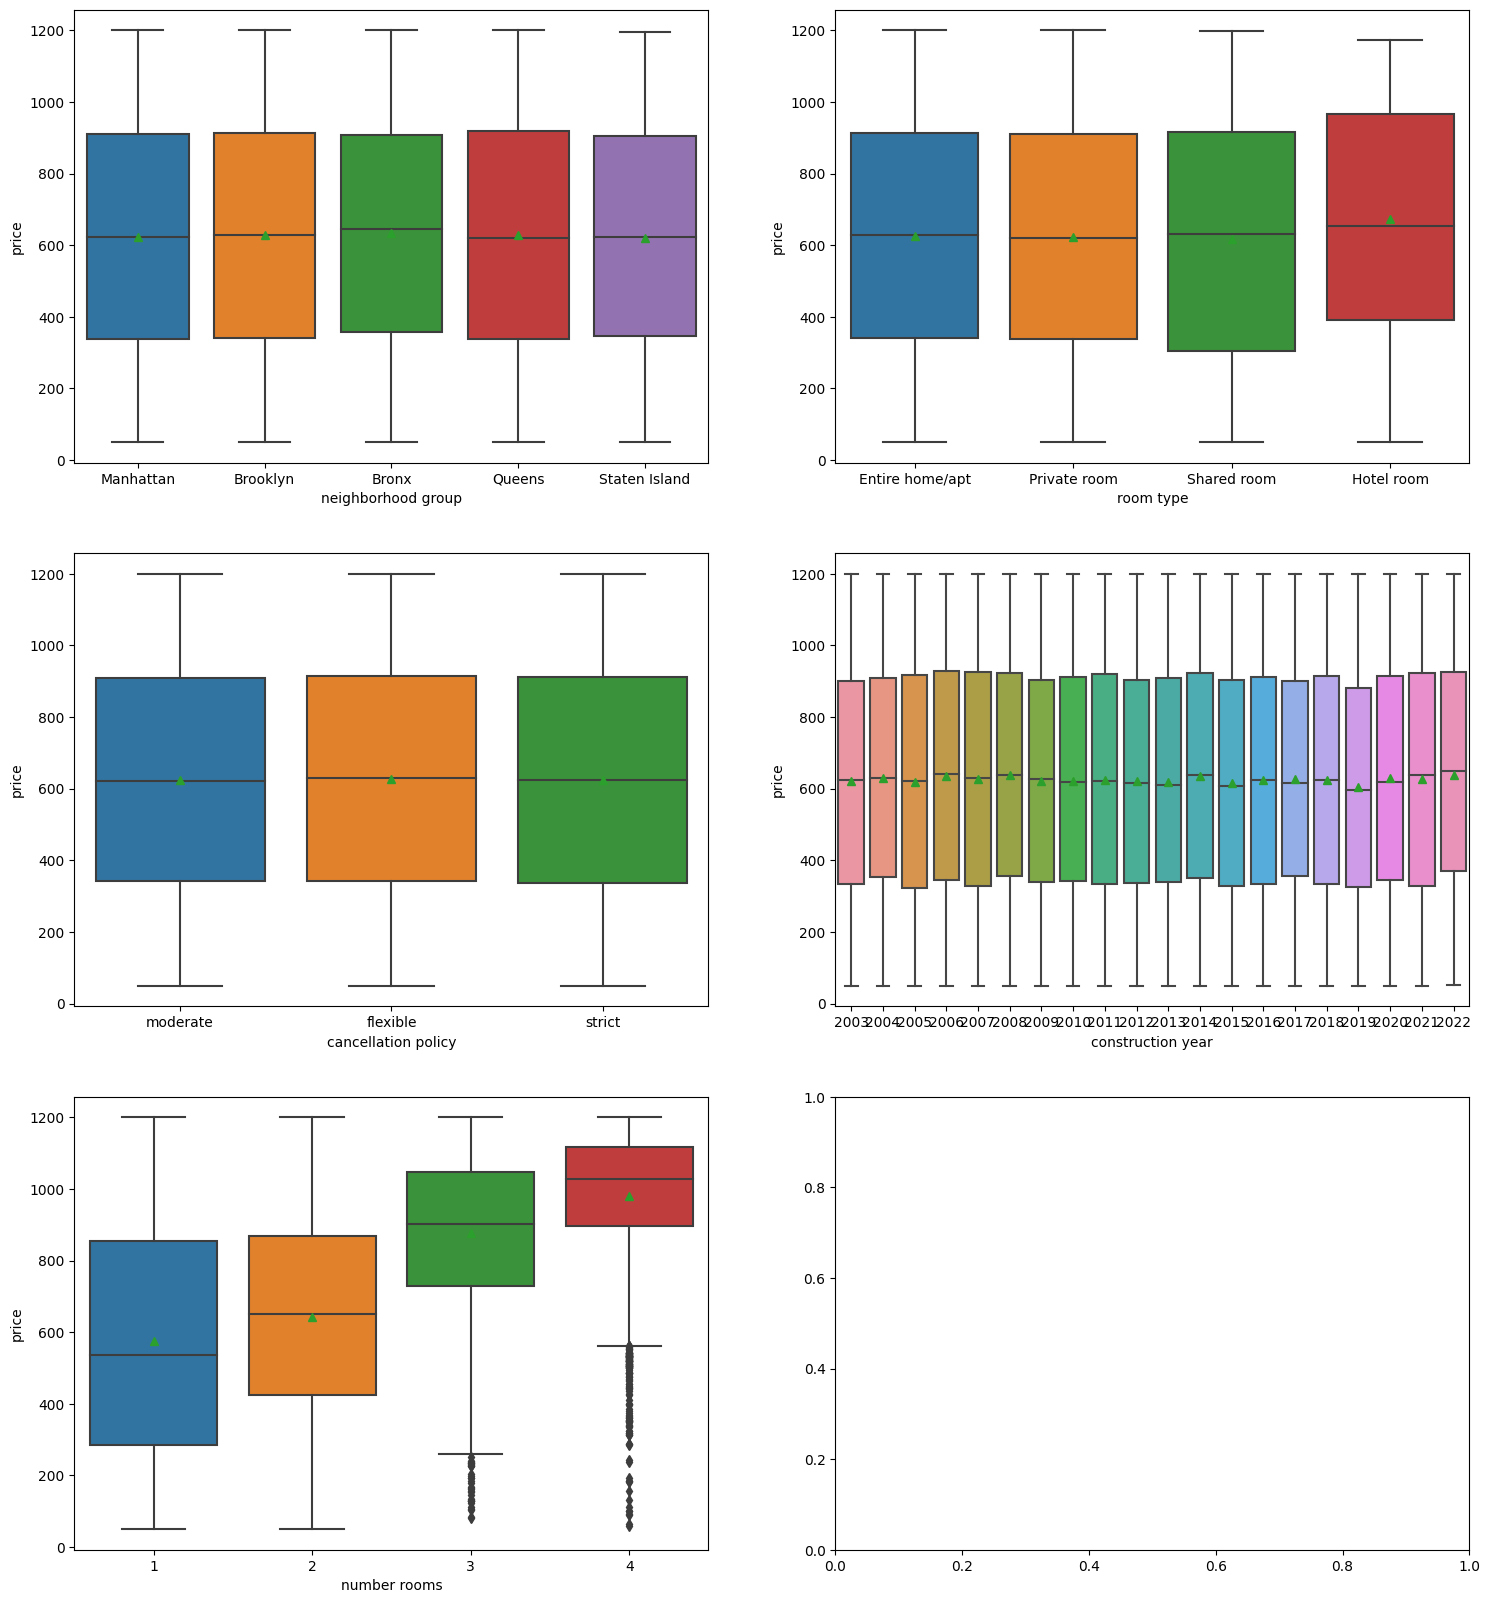

In [10]:
# Your answer goes here

fig, axes = plt.subplots(3, 2, figsize=(18, 20))

sns.boxplot(ax=axes[0, 0], data=df_cleaned, x='neighborhood group',y='price',showmeans=True)
sns.boxplot(ax=axes[0,1], data=df_cleaned, x='room type',y='price',showmeans=True)
sns.boxplot(ax=axes[1,0], data=df_cleaned, x='cancellation policy',y='price',showmeans=True)
sns.boxplot(ax=axes[1,1], data=df_cleaned, x='construction year',y='price',showmeans=True)
sns.boxplot(ax=axes[2,0], data=df_cleaned, x='number rooms',y='price',showmeans=True)


_Answer:_
Among all those variables, "room type" and "number rooms" most prominently.


### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

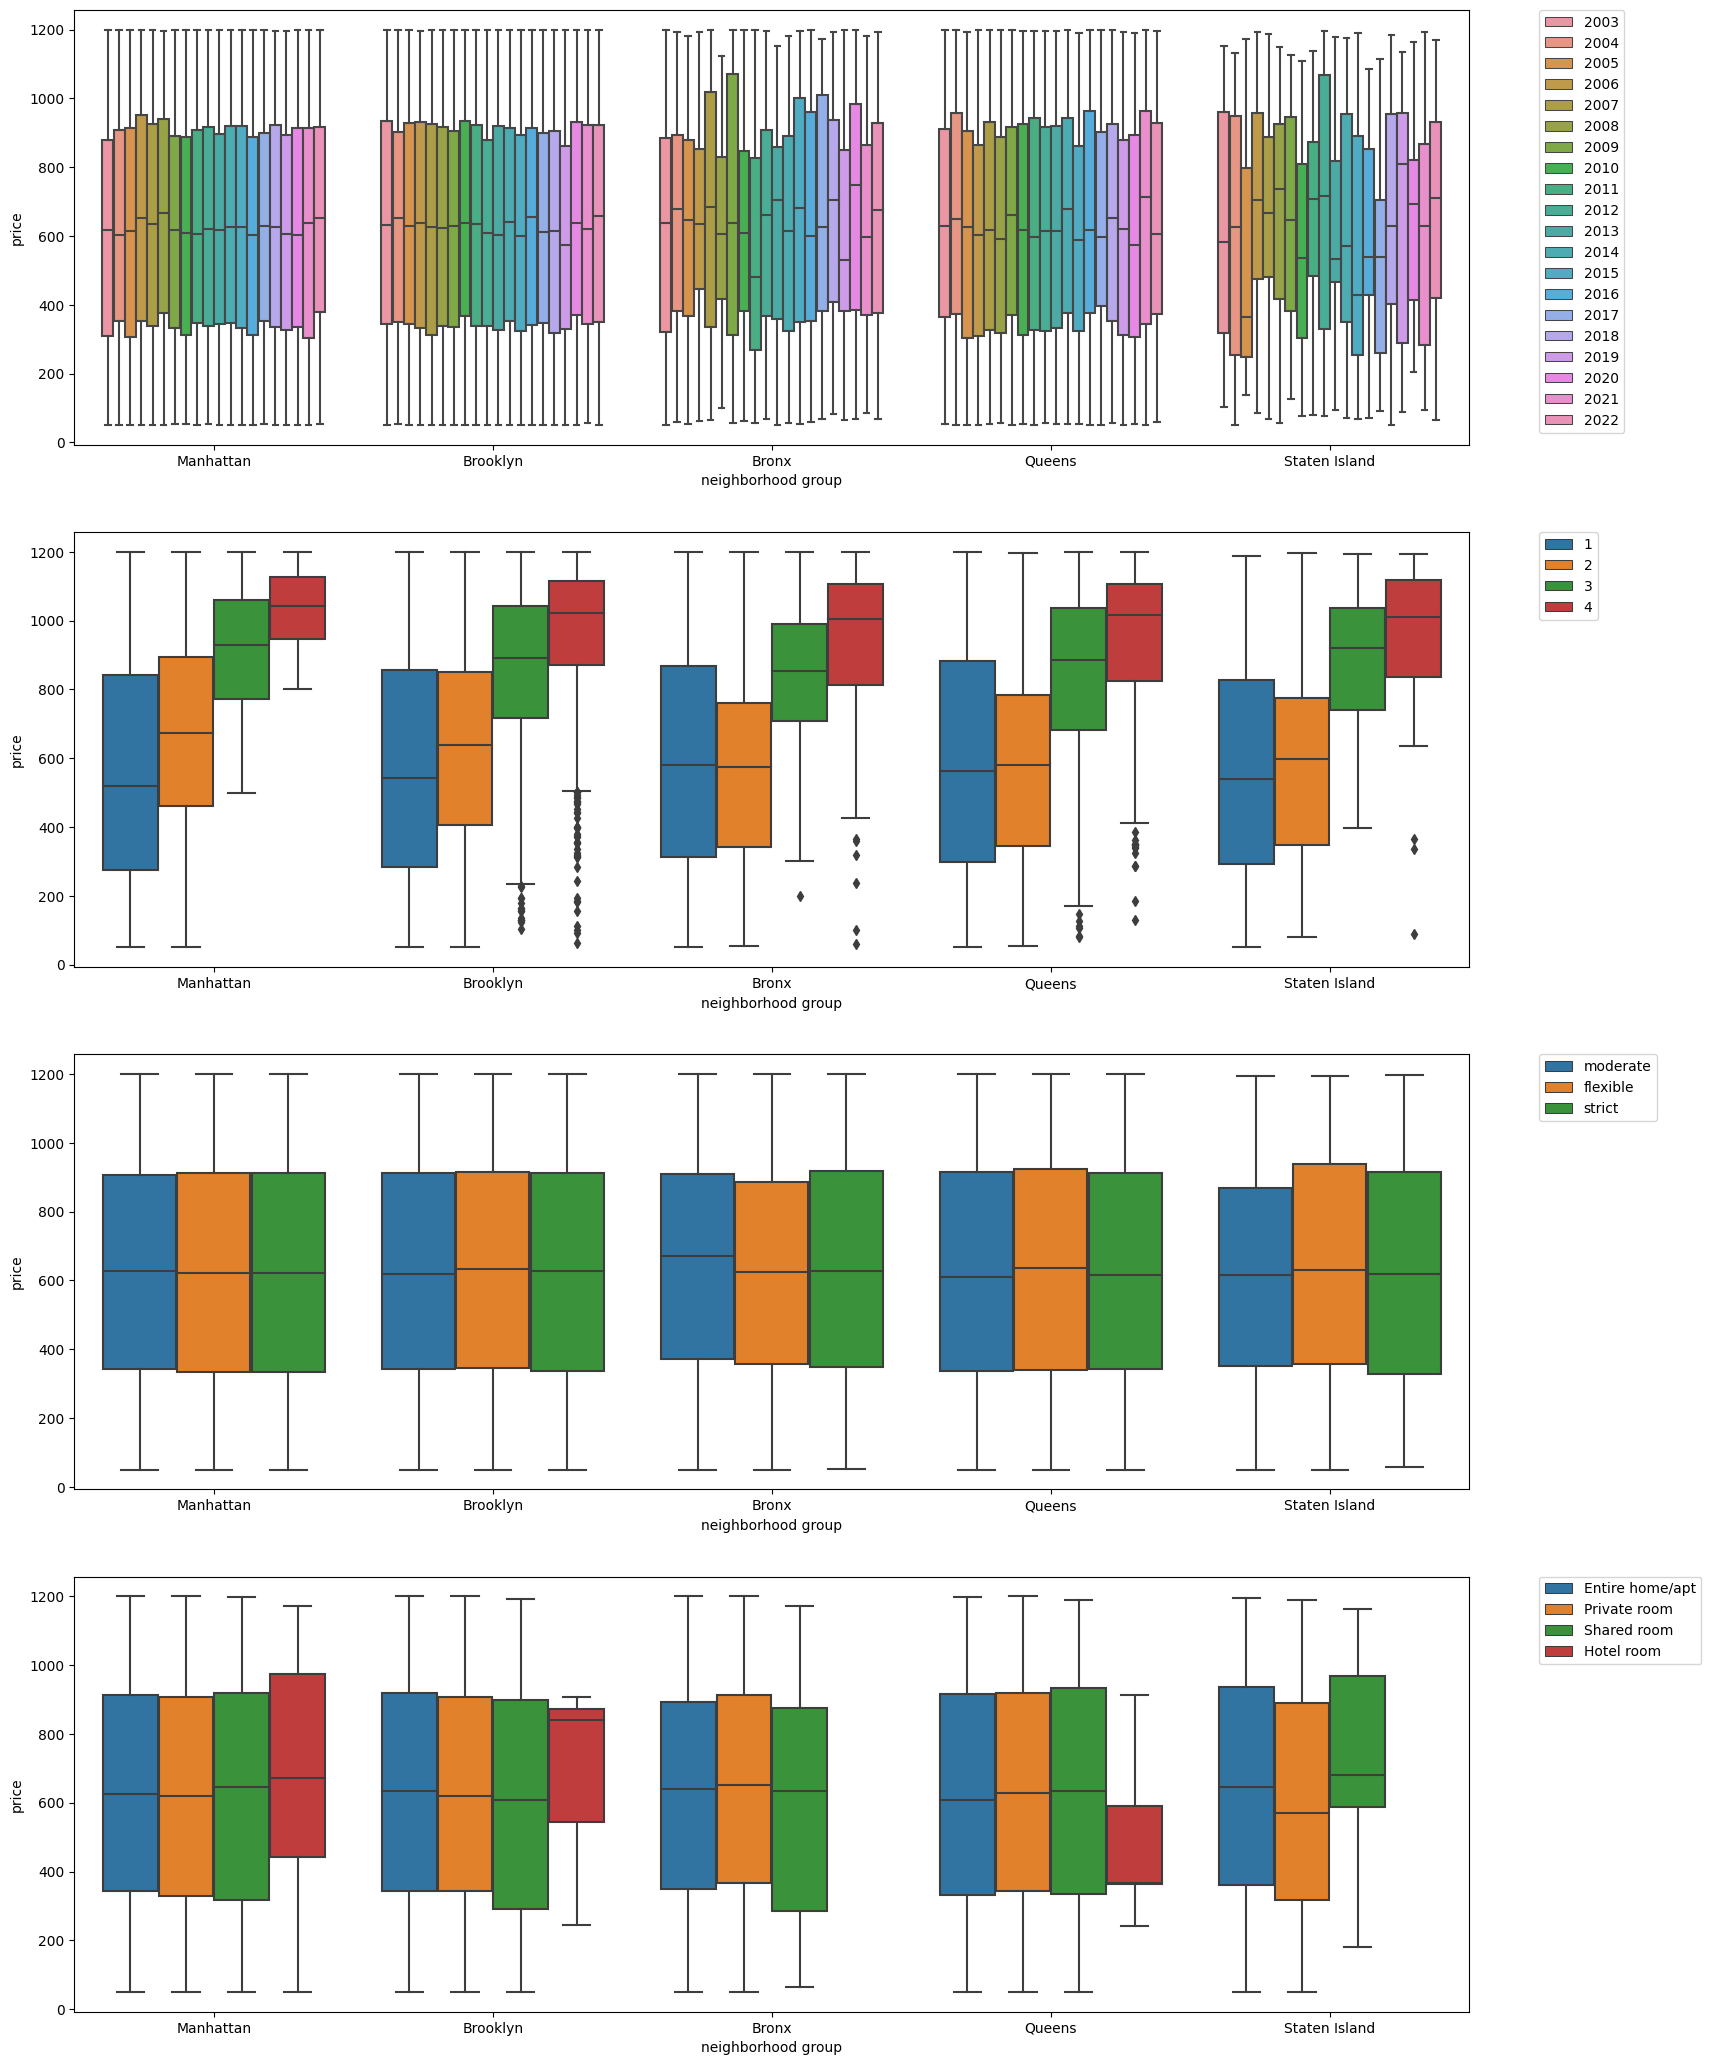

In [116]:
# Your answer goes 

features_choosed=np.array(["construction year", "number rooms", "cancellation policy", "room type", "neighborhood group"])

f=plt.figure(figsize=[18,26])
for i in range(4):
    f.add_subplot(4,1,i+1)
    ax=sns.boxplot(data=df_cleaned, x="neighborhood group", y="price",hue=features_choosed[i])
    plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0,fontsize="medium")

_Answer:_

"neighborhood group" and "construction year":\
In Manhattan, Brooklyn and Queens, construction year doesn't seem to play an important role. And the price distributions with regard to construction year in these three neighborhood group are quite similar.

"neighborhood group" and "number rooms":\
Although number of rooms has a huge impact on the price, but neighborhod group doesn't influence price too much.

"neighborhood group" and "cancellation policy":\
Neither from the pespective of nighborhood group nor from the perspective of cancellation policy can we see a big impact on price

"neighborhood group" and "room type":\
There is no obvious difference among the price of Entire home/apt,  Private room and Shared room in Manhattan, Brooklyn and Bronx.

#### Multivariate Analysis for Room Type

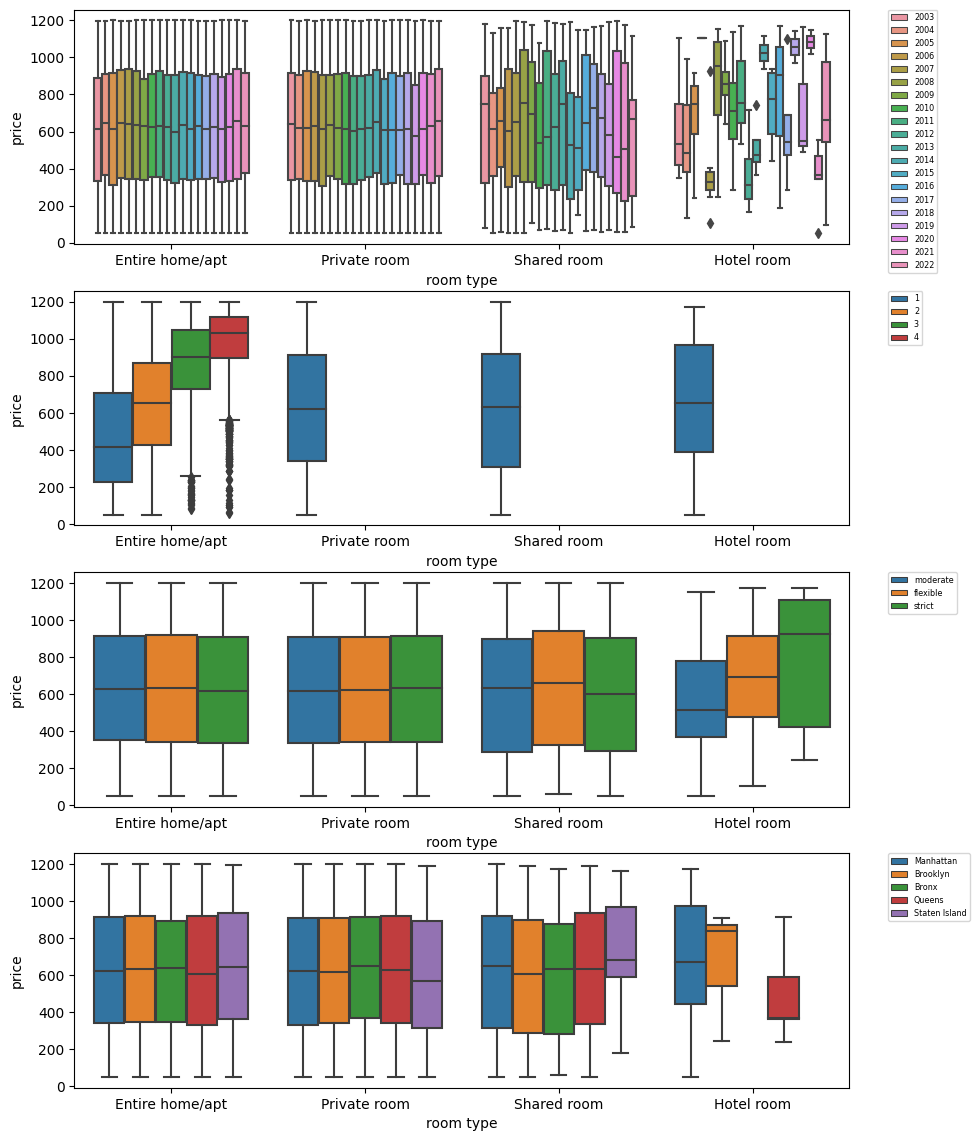

In [49]:
# Your answer goes here
features_choosed=np.array(["construction year", "number rooms", "cancellation policy", "neighborhood group"])

f=plt.figure(figsize=[10,14])
for i in range(4):
    f.add_subplot(4,1,i+1)
    sns.boxplot(data=df_cleaned, x="room type", y="price", hue=features_choosed[i])
    plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0,fontsize="xx-small")

_Answer:_

"room type" and "construction year":\
When it comes to Entire home/apt or private room, construction year do not play an important role.

"room type" and "number of rooms":\
There is no obvious price differece in Private room, Shared room and Hotel room.

"room type" and "cancellation policy":\
There is no obvious price different inside and between the group of Entire home/apt and Private room.

"room type" and "neighborhood group":\
There is no obvious price different inside and between the group of Entire home/apt and Private room.


#### Multivariate Analysis for Number of Rooms

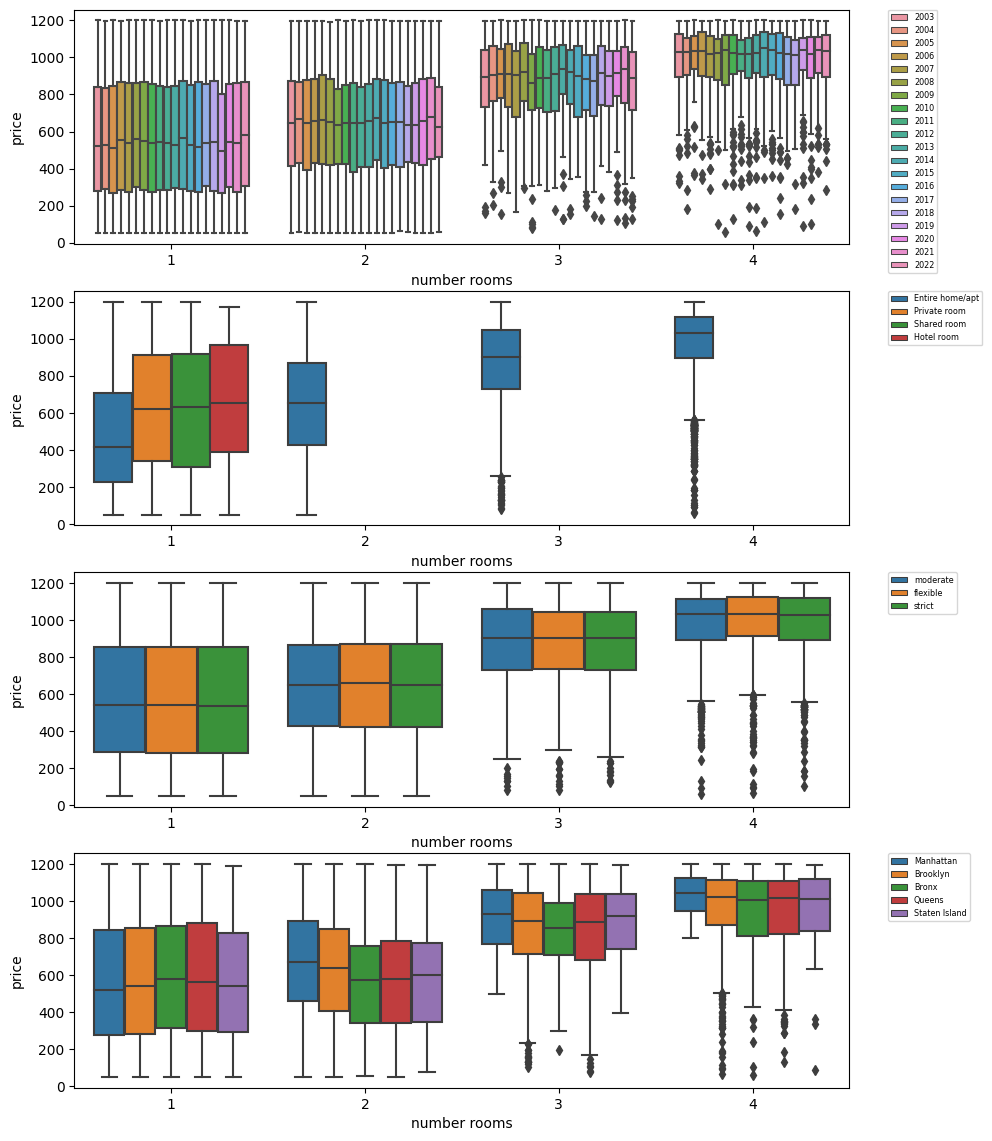

In [50]:
# Your answer goes here

features_choosed=np.array(["construction year", "room type", "cancellation policy", "neighborhood group"])

f=plt.figure(figsize=[10,14])
for i in range(4):
    f.add_subplot(4,1,i+1)
    sns.boxplot(data=df_cleaned, x="number rooms", y="price", hue=features_choosed[i])
    plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0,fontsize="xx-small")

_Answer:_

"number of rooms" and "construction year":\
no obvious price difference inside the group of 1-room house and 2-room house

"number of rooms" and "room type":\
clear difference inside the group of 1-room house, and also clear difference between house with different number of room.

"number of rooms" and "cancellation policy":\
no obvious different inside each group

"number of rooms" and "neighborhood group":\
clear difference between each groups, small difference inside groups

#### Multivariate Analysis for Construction Year

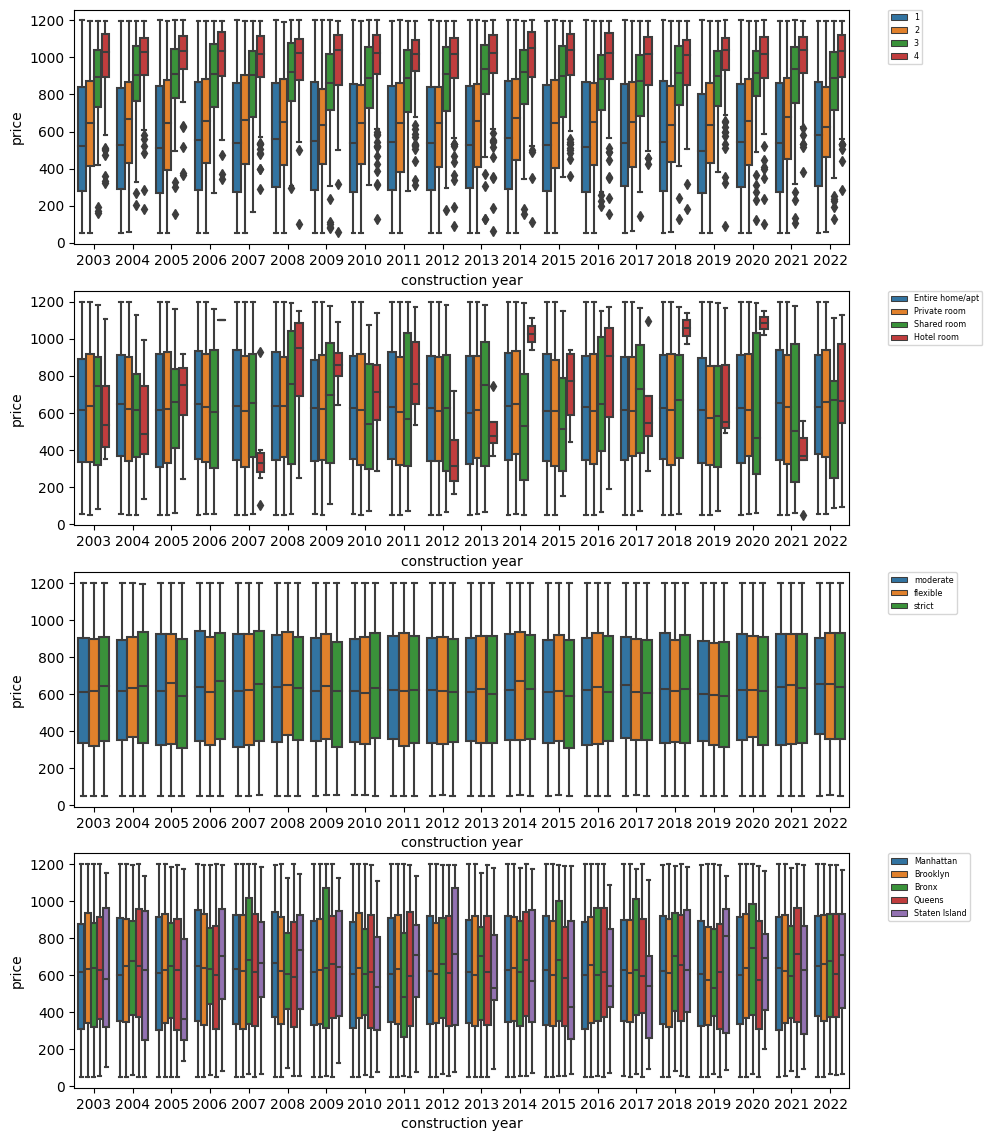

In [51]:
# Your answer goes here


features_choosed=np.array(["number rooms", "room type", "cancellation policy", "neighborhood group"])

f=plt.figure(figsize=[10,14])
for i in range(4):
    f.add_subplot(4,1,i+1)
    sns.boxplot(data=df_cleaned, x="construction year", y="price", hue=features_choosed[i])
    plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0,fontsize="xx-small")

_Answer:_

"construction year" and "number of rooms":\
no obvious differece between the groups of different construction year.

"construction year" and "room type":\
no obvious price difference in Entire home/apt and Private room from different construction year

"construction year" and "cancellation policy":\
no obvious difference inside and between each construction year

"construction year" and "neighborhood group":\
no obvious difference inside and between each construction year


### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
number of rooms + room type

## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [117]:
# Your answer goes here
features=np.array(["number rooms","neighborhood group","room type"]) #only use those features as descriptive features
x_train,x_test, y_train, y_test = train_test_split(df_cleaned[features],df_cleaned["price"],test_size=0.05,random_state=100)
time_baseline_start=time.time()
baseline=df_cleaned["price"].mean()  #compute the baseline using the mean of all prices
time_baseline_end=time.time()
print("The baseline is {:.1f}".format(baseline))

baseline_array=np.ones(y_test.shape[0])*baseline   #create an array for the calculation of MAE
error_baseline= mean_absolute_error(y_test, baseline_array)
print("Mean absolute error of Baseline: %.2f" % error_baseline)

The baseline is 625.5
Mean absolute error of Baseline: 284.56


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [126]:
# Your answer goes here

price_bins=np.array([49,200,400,600,800,1000,1200]) #define the boundary of each bins. Set 49 as the first boundary to include 50 in the first bin.
price_cut=pd.cut(df_cleaned["price"],price_bins)
# price_cut = pd.DataFrame(price_cut)
price_cut

0           (49, 200]
1          (600, 800]
2          (200, 400]
3          (200, 400]
4           (49, 200]
             ...     
70837       (49, 200]
70838     (800, 1000]
70839     (800, 1000]
70840    (1000, 1200]
70841     (800, 1000]
Name: price, Length: 70842, dtype: category
Categories (6, interval[int64]): [(49, 200] < (200, 400] < (400, 600] < (600, 800] < (800, 1000] < (1000, 1200]]

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [176]:
# Your answer goes here

tree_feature=pd.DataFrame({"number rooms":df_cleaned["number rooms"],"neighborhood group":df_cleaned["neighborhood group"],"room type":df_cleaned["room type"]})
# Although "number of room" is several numbers, but actually it is nominal cateorical features, and should be one-hot-encoded later.
tree_feature["number rooms"] = tree_feature["number rooms"].astype(str)
price_cut=price_cut.astype(str) #change "category" into "string"

#While splitting the test and training set, other than the price bin, we also include the original price, for later use in clustering.
price_both=pd.DataFrame({"price_bins":price_cut,"price_original":df_cleaned["price"]})
x_train_tree,x_test_tree, y_train_both, y_test_both = train_test_split(tree_feature.values,price_both.values,test_size=0.05,random_state=100)
# y_train_tree and y_test_tree is the target price bin.
y_train_tree,y_test_tree=y_train_both[:,0],y_test_both[:,0]

<class 'str'>


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

In [128]:
# Your answer goes here
descriptive_features=np.array(["number rooms", 'neighborhood group',"room type"])
time_tree_start=time.time()
decisionTree = DecisionTree(x_train_tree.tolist(), descriptive_features.tolist(), y_train_tree.tolist(), "entropy")
decisionTree.id3(0,10)  #gain_threshold=0 and minimum_samples=10
time_tree_end=time.time()
dot = decisionTree.print_visualTree()
print("System entropy: ", format(decisionTree.entropy))

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!
System entropy:  2.577072828540696


What is the first feature the decision tree splits on?

_Answer:_ number of rooms

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_
500
700


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [129]:
# Your answer goes here
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor


predictor = get_predictor(dot)
proposed= predictor[('number rooms', '2', 'neighborhood group', 'Manhattan', 'room type', 'Entire home/apt')]
#create a dictionary to store the correspondece between price bin and price
correspondence={'(49, 200]':125,'(200, 400]':300,'(400, 600]':500,'(600, 800]':700,'(800, 1000]':900,'(1000, 1200]':1100}
print("Proposed price: ",correspondence[proposed])


Proposed price:  700


To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [87]:
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)


To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [88]:
# Your answer goes here

x_test_df=pd.DataFrame(x_test_tree)  #turn numpy array into panda dataframe
x_test_df.columns = ['number rooms', 'neighborhood group', 'room type']  # set names for each column
x_test_instance=x_test_df.to_dict("records")  #convert the dataframe into a dictionary 

y_predict_range=[] #creating an empty list for storing the predicted price range later
for instance in x_test_instance:
    y_predict_range.append(get_predicted_bin(instance,features,predictor))
y_predict_range=np.array(y_predict_range) #convert the predicted price list into numpy array


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [89]:
# Your answer goes here


y_predict=[] #create a empty list to store the predicted price later

for i in range(len(y_test_tree)):
    y_predict.append(correspondence[y_predict_range[i]])
    
error_tree=mean_absolute_error(y_test_both[:,1],y_predict)
print("Mean absolute error of decision tree: %.2f" % error_tree)

Mean absolute error of decision tree: 271.02


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [90]:
# Your answer goes here


encoder = OneHotEncoder(categories='auto')

#let the encoder learn the encoding rule, in case that it learns different rules for traning set and testing set.
one_hot_rule=[["1","Bronx","Entire home/apt"],["2","Brooklyn","Hotel room"],["3","Manhattan", "Private room"],["4","Queens","Shared room"],["4","Staten Island","Shared room"]]
r=encoder.fit(one_hot_rule)

x_train_cluster = encoder.transform(x_train_tree).toarray()  #one-hot encoding for training set
x_test_cluster = encoder.transform(x_test_tree).toarray()  #one-hot encoding for tesing set



### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

100%|██████████| 12/12 [01:27<00:00,  7.33s/it]


Text(0, 0.5, 'Standard Deviation of the Means')

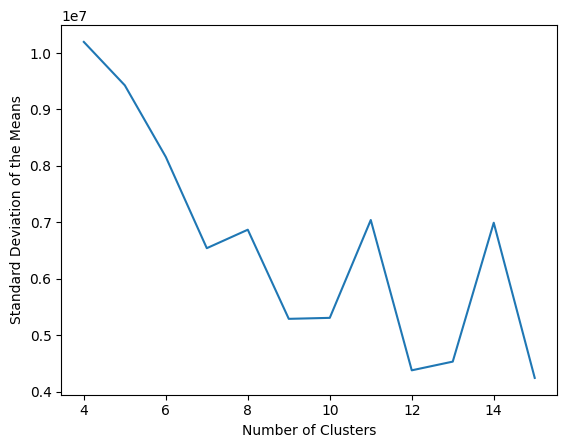

In [131]:
# Your answer goes here
from tqdm import tqdm


standard_deviation_list=np.zeros(12)  #create an numpy array for storing standard deviations later
for cluster_num in tqdm(range(4,16)):
    kmeans = KMeans(n_clusters=cluster_num, n_init=100,random_state=100).fit(x_train_cluster)
    label=kmeans.labels_  #get an array specifying the cluster each instance belongs to
    means=np.zeros(cluster_num)  #create an array to store the mean prices later
    for i in range (cluster_num):
        means[i]=np.mean(y_train_both[:,1][label==i])  #calculate the mean price for each cluster
##############
######底下是用肘部算法的
    std_sum=0
    for i in range(cluster_num):
        std_i=np.sum(((y_train_both[:,1][label==i]-means[i])**2)**0.5)/(i+1)
        std_sum+=std_i
    
    standard_deviation_list[cluster_num-4]=std_sum #calculate the standard deviation of the mean prices
##############
#     standard_deviation_list[cluster_num-4]=np.std(means) #calculate the standard deviation of the mean prices


plt.figure()
plt.plot(np.linspace(4,15,12),standard_deviation_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Standard Deviation of the Means")

_Answer:_



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [161]:
# Your answer goes here
# cluster for 9 clusters
time_cluster_start=time.time()
kmeans = KMeans(n_clusters=9, n_init=100,random_state=100).fit(x_train_cluster)
time_cluster_end=time.time()
label=kmeans.labels_  #get an array specifying which cluster each instance belong to

x_my_apartment = encoder.transform([["2","Manhattan", "Entire home/apt"]]).toarray()
label_number=kmeans.predict(x_my_apartment)  #get the cluster label for my apartment
#compute the mean prices for the cluster that my apartment belongs to, round to 2 decimal place
price_clustering=round(np.mean(y_train_both[:,1][label==label_number]), 2)  

print("The price predicted by KMeans Clustering is ",price_clustering)


The price predicted by KMeans Clustering is  650.54


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [181]:
import umap.umap_ as umap
from sklearn import preprocessing

#Preprocessing numerical
full_data = pd.DataFrame(x_train_tree) # use the train dataset here
full_data[0] = full_data[0].astype(int)

numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

c:\Users\86136\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\86136\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

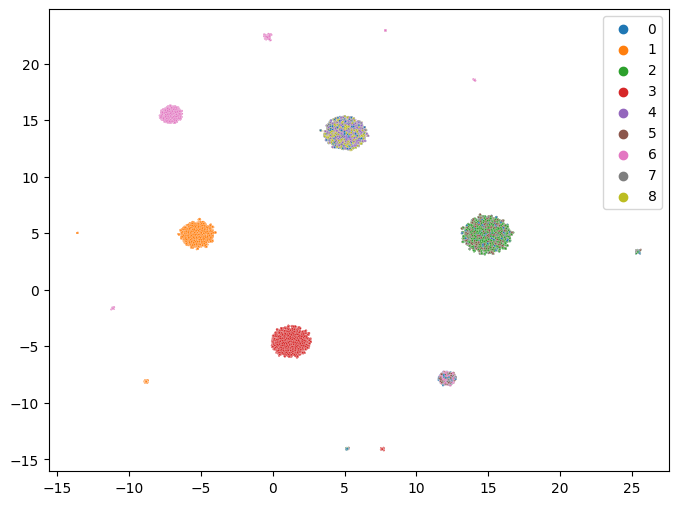

In [182]:
# Your answer goes here

fig, plots = plt.subplots(figsize=[8,6])
sns.scatterplot(x=dimension1, y=dimension2, hue=label, palette="tab10",s=2)
plt.legend(loc="upper right")

_Answer:_\
There exist several distinct clusters, which K-Means well detected. However,a distinct cluster may contain several classes. For example, the upper cluster has green and purple inside, which we suspect may result from dimension redcution.\
There exist outlier, e.g. orange class and red class.


We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [183]:
# Your answer goes here

means_9=np.zeros(9)  #create an array to store the mean prices for each cluster later
for i in range (9):
    means_9[i]=np.mean(y_train_both[:,1][label==i])  #compute the mean prices of each cluster

y_test_label=kmeans.predict(x_test_cluster)  #get the cluster label for each instance
y_test_predict=np.zeros(len(y_test_label))  
for i in range(9):
    y_test_predict[y_test_label==i]=means_9[i]  #get the predict price for each instance

error_cluster=mean_absolute_error(y_test_both[:,1], y_test_predict)
print("Mean absolute error of clustering: %.2f" % error_cluster)

Mean absolute error of clustering: 256.73


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

In [184]:
print("_Answer:")

mydata = [["Basline",error_baseline, round(time_baseline_end-time_baseline_start,4)],
          ["Decision tree",error_tree, round(time_tree_end-time_tree_start,4)],
          ["Clustering",error_cluster, round(time_cluster_end-time_cluster_start,4)]]

head = ["","MAE", "Running Time"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

print("All of them reach a MAE error above 250, which is very high. Even though Clustering results in a slightly"\
      "smaller error, the running time increases dramatically. We believe all of them do NOT provide a good way "\
      "for determining the price.")

_Answer:
+---------------+---------+----------------+
|               |     MAE |   Running Time |
+===============+=========+================+
| Basline       | 284.563 |         0      |
+---------------+---------+----------------+
| Decision tree | 271.023 |         0.8837 |
+---------------+---------+----------------+
| Clustering    | 256.73  |         7.4094 |
+---------------+---------+----------------+
All of them reach a MAE error above 250, which is very high. Even though Clustering results in a slightlysmaller error, the running time increases dramatically. We believe all of them do NOT provide a good way for determining the price.


## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

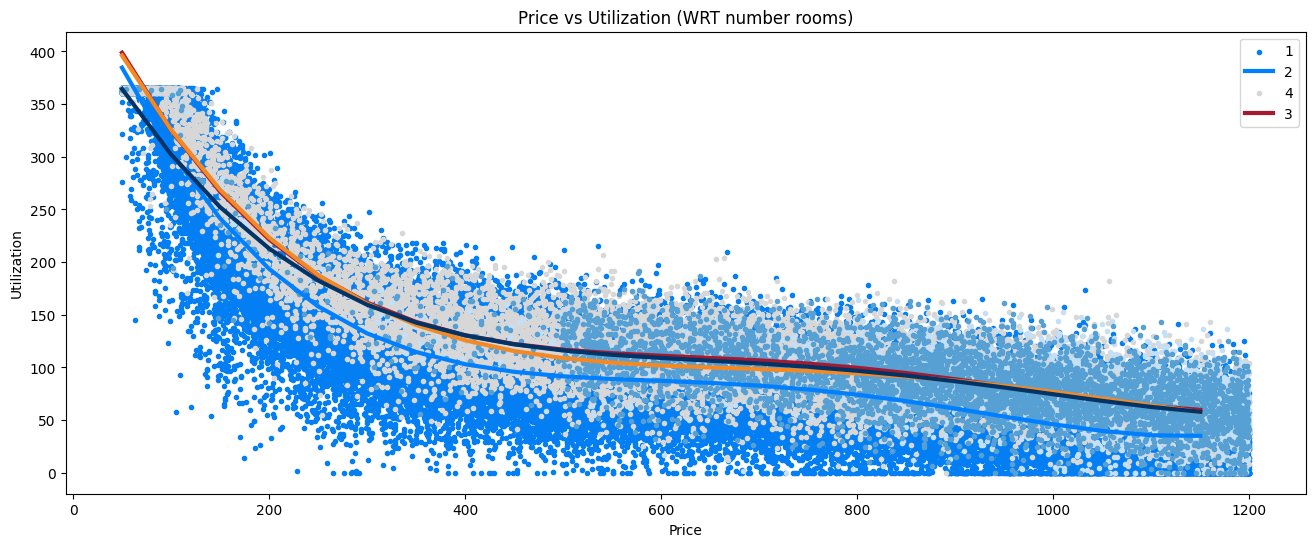

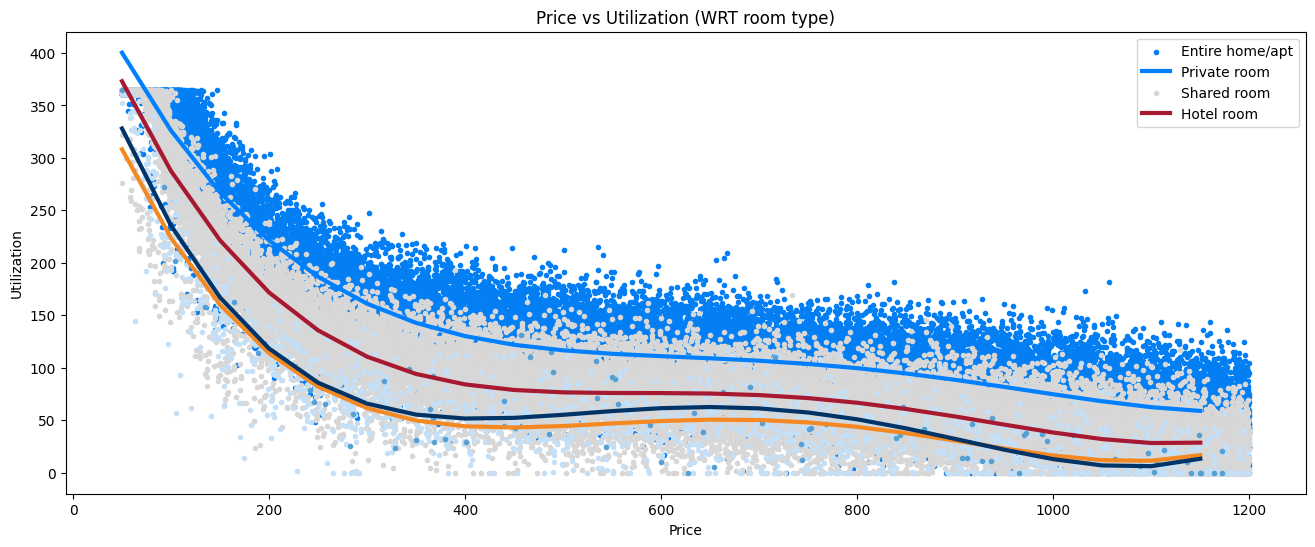

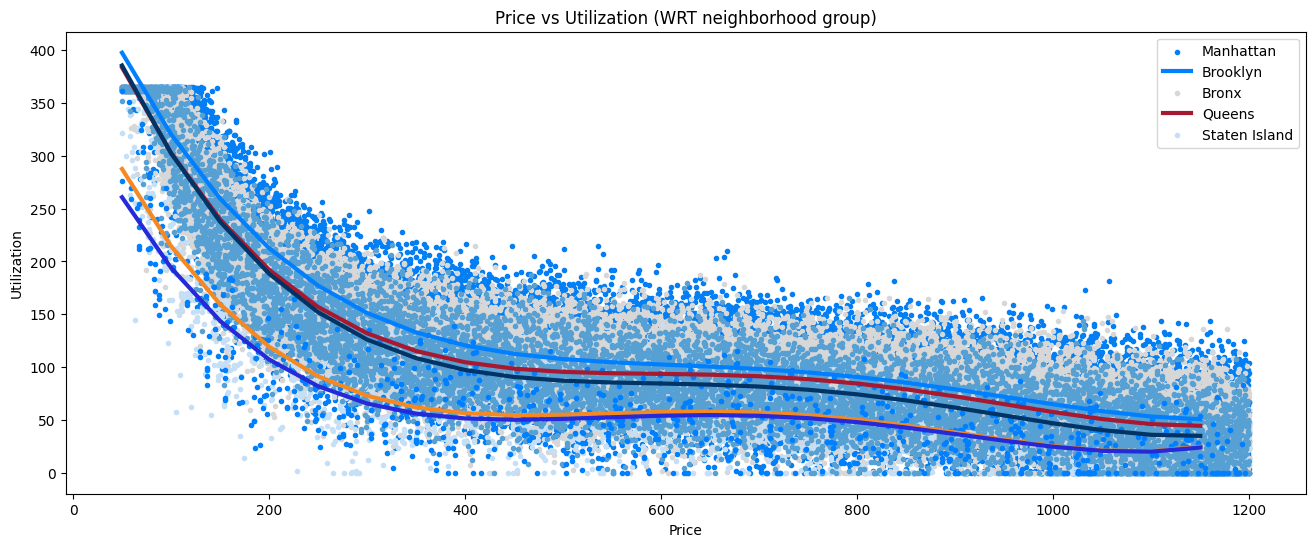

In [194]:
# Your answer goes here


df_utilization=pd.read_csv("AirBnB_utilization.csv") #read the dataset

line_names = locals()
colors=["#037ef3","#d7d7d8","#c4dff6","#56a0d3","#0080ff","#a71930","#f48924","#003366","#2529d8","#754F44"] #for later plotting

varias=["number rooms","room type","neighborhood group"]
for j in range(len(varias)):  #plot for each of the above variable
    plt.figure(figsize=[16,6])
    varia_unique=df_utilization[varias[j]].unique() #return the uniques for each variable
    for i in range(len(varia_unique)):
        data=df_utilization[df_utilization[varias[j]]==varia_unique[i]]  #e.g.only keep the data of 1-room house 
        plt.scatter(data["price"],data["utilization"],marker=".",c=colors[i])
        parameter=np.polyfit(data["price"],data["utilization"], 4)  #try to fit an 4th order polynomial to see the trend
        p = np.poly1d(parameter)
        price_series=np.arange(50,1200,50)
        plt.plot(price_series,p(price_series), linewidth=3,c=colors[i+4])  #draw the fitted curve
    plt.xlabel("Price")
    plt.ylabel("Utilization")
    plt.legend(varia_unique)
    plt.title("Price vs Utilization (WRT "+str(varias[j]+")"))
    plt.show()


You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [17]:
# Your answer goes here

#get descriptive features and target feature
DescriptiveFeatures=pd.DataFrame(df_utilization,columns=["neighborhood group","room type","number rooms","price"])
# We believe "number rooms" is an nominal categorical data, so we turn that column into string type
DescriptiveFeatures["number rooms"] = DescriptiveFeatures["number rooms"].astype(str)
TargetFeature=pd.DataFrame(df_utilization,columns=["utilization"])

#one-hot-encoding
DescriptiveFeature_onehot = pd.get_dummies(DescriptiveFeatures)

#normalizing
price_min, price_max=DescriptiveFeature_onehot["price"].min(),DescriptiveFeature_onehot["price"].max()
DescriptiveFeature_onehot["price"] = DescriptiveFeature_onehot["price"].apply(lambda x: (x-price_min)/(price_max-price_min))

#splitting
x_train_uti,x_test_uti, y_train_uti, y_test_uti = train_test_split(DescriptiveFeature_onehot.values,TargetFeature.values,test_size=0.05,random_state=100)


For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [18]:
# Your answer goes here
#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False


grid = GridSearchCV(LinearRegression(), {"positive":[True,False]}, cv=5, verbose=3)
grid.fit(x_train_uti,y_train_uti)
print(grid.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .....................positive=True;, score=0.142 total time=   0.0s
[CV 2/5] END .....................positive=True;, score=0.151 total time=   0.0s
[CV 3/5] END .....................positive=True;, score=0.160 total time=   0.0s
[CV 4/5] END .....................positive=True;, score=0.153 total time=   0.0s
[CV 5/5] END .....................positive=True;, score=0.149 total time=   0.0s
[CV 1/5] END ....................positive=False;, score=0.659 total time=   0.0s
[CV 2/5] END ....................positive=False;, score=0.659 total time=   0.0s
[CV 3/5] END ....................positive=False;, score=0.661 total time=   0.0s
[CV 4/5] END ....................positive=False;, score=0.665 total time=   0.0s
[CV 5/5] END ....................positive=False;, score=0.661 total time=   0.0s
{'positive': False}


What is the mean absolute error achieved on the test data?

In [19]:
# Your answer goes here
y_predict_uti = grid.predict(x_test_uti)  #get the predicted utilization
error_linear_regression=mean_absolute_error(y_test_uti, y_predict_uti) #calculate MSE
print("Mean absolute error of regression model: %.2f" % error_linear_regression)

Mean absolute error of regression model: 35.34


Show (draw!) the price elasticity for your apartment. 

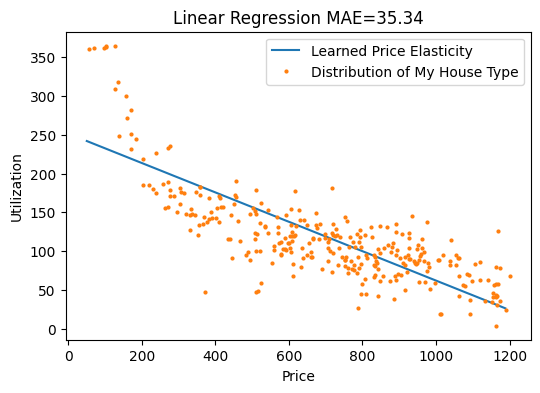

In [23]:
# create a dataframe, encoding the information of my apartment with different prices
my_house_encoded = np.array([[0,0,1,0,0,1,0,0,0,0,1,0,0]]*100)
price_ = np.linspace(0, 1, 100)[:, None]
my_house_x = np.concatenate((price_,my_house_encoded), axis=1)

#get the predicted utilization of my apartment at different prices
my_house_y=grid.predict(my_house_x)

# filter the instances in dataset, which has the same condition as my apartment, for drawing scatter plot later
my_apartment_comparable=np.where((x_test_uti[:,1:14] == [0,0,1,0,0,1,0,0,0,0,1,0,0]).all(axis=1))  #two room, Manhattan,Entire home/apt


plt.figure(figsize=(6,4))
plt.plot(np.arange(50,1200,11.5),my_house_y)
plt.plot((x_test_uti[my_apartment_comparable][:,0])*1150+50,y_test_uti[my_apartment_comparable],'o', markersize=2)
plt.title('Linear Regression MAE=%.2f' %error_linear_regression)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.legend(['Learned Price Elasticity', 'Distribution of My House Type'])

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [24]:
# Your answer goes here


param_grid = {"C":[0.2,0.5,1],
             "loss":['epsilon_insensitive', 'squared_epsilon_insensitive']}
grid = GridSearchCV(LinearSVR(), param_grid, cv = 5, verbose = 2) 
y_train_column=np.ravel(y_train_uti) #change array to column
grid.fit(x_train_uti,y_train_column)
print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................C=0.2, loss=epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.2, loss=epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.2, loss=epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.2, loss=epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.2, loss=epsilon_insensitive; total time=   0.0s
[CV] END ............C=0.2, loss=squared_epsilon_insensitive; total time=   0.1s
[CV] END ............C=0.2, loss=squared_epsilon_insensitive; total time=   0.1s
[CV] END ............C=0.2, loss=squared_epsilon_insensitive; total time=   0.1s
[CV] END ............C=0.2, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END ............C=0.2, loss=squared_epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.5, loss=epsilon_insensitive; total time=   0.0s
[CV] END ....................C=0.5, loss=epsilon_

What is the mean absolute error achieved on the test data?

In [25]:
# Your answer goes here

y_predict_uti=grid.predict(x_test_uti)
error_linear_SVR=mean_absolute_error(y_test_uti, y_predict_uti)
print("Mean absolute error of SVR model: %.2f" % error_linear_SVR)

Mean absolute error of SVR model: 35.34


Show (draw!) the price elasticity for your apartment. 

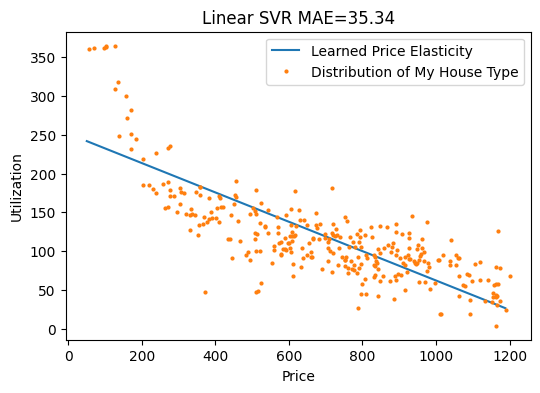

In [28]:
# Your answer goes here

my_house_y_LSVR=grid.predict(my_house_x)


plt.figure(figsize=(6,4))
plt.plot(np.arange(50,1200,11.5),my_house_y_LSVR)
plt.plot((x_test_uti[my_apartment_comparable][:,0])*1150+50,y_test_uti[my_apartment_comparable],'o', markersize=2)
plt.title('Linear SVR MAE=%.2f' %error_linear_regression)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.legend(['Learned Price Elasticity', 'Distribution of My House Type'])

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [29]:
# Your answer goes here

from sklearn.kernel_ridge import KernelRidge

reduced_index=np.random.choice(67299,25000, replace=False)
x_train_reduced=x_train_uti[reduced_index]
y_train_reduced=y_train_uti[reduced_index]


param_grid = {"alpha":[0.2,0.5],
             "kernel":['polynomial', 'rbf'],
             "degree":[2,3]}
grid = GridSearchCV(KernelRidge(), param_grid, cv = 5, verbose = 2) 
y_train_column=np.ravel(y_train_reduced)#change array to column
grid.fit(x_train_reduced,y_train_column)
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .............alpha=0.2, degree=2, kernel=polynomial; total time=  56.1s
[CV] END .............alpha=0.2, degree=2, kernel=polynomial; total time=  54.3s
[CV] END .............alpha=0.2, degree=2, kernel=polynomial; total time=  53.4s
[CV] END .............alpha=0.2, degree=2, kernel=polynomial; total time=  54.9s
[CV] END .............alpha=0.2, degree=2, kernel=polynomial; total time=  55.8s
[CV] END ....................alpha=0.2, degree=2, kernel=rbf; total time=  57.6s
[CV] END ....................alpha=0.2, degree=2, kernel=rbf; total time=  54.4s
[CV] END ....................alpha=0.2, degree=2, kernel=rbf; total time=  52.5s
[CV] END ....................alpha=0.2, degree=2, kernel=rbf; total time=  54.2s
[CV] END ....................alpha=0.2, degree=2, kernel=rbf; total time=  53.2s
[CV] END .............alpha=0.2, degree=3, kernel=polynomial; total time= 1.0min
[CV] END .............alpha=0.2, degree=3, kernel

What is the mean absolute error achieved on the test data?

In [30]:
# Your answer goes here

y_predict_uti=grid.predict(x_test_uti)
error_kernel_regression=mean_absolute_error(y_test_uti, y_predict_uti)
print("Mean absolute error of kerneled regression model: %.2f" % error_kernel_regression)

Mean absolute error of kerneled regression model: 27.84


Show (draw!) the price elasticity for your apartment. 

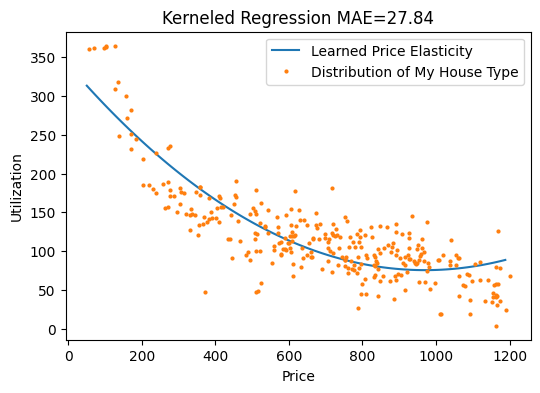

In [33]:
# Your answer goes here

my_house_y_Kregression=grid.predict(my_house_x)



plt.figure(figsize=(6,4))
plt.plot(np.arange(50,1200,11.5),my_house_y_Kregression)
plt.plot((x_test_uti[my_apartment_comparable][:,0])*1150+50,y_test_uti[my_apartment_comparable],"o", markersize=2)
plt.title('Kerneled Regression MAE=%.2f' %error_kernel_regression)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.legend(['Learned Price Elasticity', 'Distribution of My House Type'])


#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [34]:
# Your answer goes here

param_grid_SVR = {"C":[0.2,0.5],
             "kernel":["poly", 'rbf'],
             "degree":[2,3]}
grid_SVR = GridSearchCV(SVR(), param_grid_SVR, cv = 5, verbose = 2) 
y_train_column=np.ravel(y_train_reduced)#change array to column
grid_SVR.fit(x_train_reduced,y_train_column)
print(grid_SVR.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=0.2, degree=2, kernel=poly; total time=  19.6s
[CV] END .......................C=0.2, degree=2, kernel=poly; total time=  20.4s
[CV] END .......................C=0.2, degree=2, kernel=poly; total time=  19.8s
[CV] END .......................C=0.2, degree=2, kernel=poly; total time=  21.1s
[CV] END .......................C=0.2, degree=2, kernel=poly; total time=  18.5s
[CV] END ........................C=0.2, degree=2, kernel=rbf; total time=  31.4s
[CV] END ........................C=0.2, degree=2, kernel=rbf; total time=  30.9s
[CV] END ........................C=0.2, degree=2, kernel=rbf; total time=  30.7s
[CV] END ........................C=0.2, degree=2, kernel=rbf; total time=  32.8s
[CV] END ........................C=0.2, degree=2, kernel=rbf; total time=  33.3s
[CV] END .......................C=0.2, degree=3, kernel=poly; total time=  17.1s
[CV] END .......................C=0.2, degree=3, 

What is the mean absolute error achieved on the test data?

In [35]:
# Your answer goes here

y_predict_uti=grid_SVR.predict(x_test_uti)
error_kernel_SVR=mean_absolute_error(y_test_uti, y_predict_uti)
print("Mean absolute error of kerneled SVR model: %.2f" % error_kernel_SVR)

Mean absolute error of kerneled SVR model: 31.81


Show (draw!) the price elasticity for your apartment. 

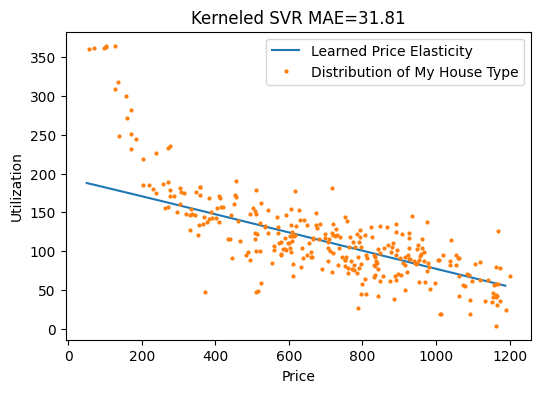

In [36]:
# Your answer goes here

my_house_y_KSVR=grid_SVR.predict(my_house_x)


plt.figure(figsize=(6,4))
plt.plot(np.arange(50,1200,11.5),my_house_y_KSVR)
plt.plot((x_test_uti[my_apartment_comparable][:,0])*1150+50,y_test_uti[my_apartment_comparable],"o",markersize=2)
plt.title('Kerneled SVR MAE=%.2f' %error_kernel_SVR)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.legend(['Learned Price Elasticity', 'Distribution of My House Type'])


What is your conclusion on using kernels?

_Answer:_

Clearly the scatter plot shows a nonlinear relationship between price and utilization. Therefore, only using a linear model to model the relationship is not enough.

As we can see from the figures and computed MAE, kerneled model provides us a great way to implicitly map the input space to some higher-dimensional feature space, and thus to model the relationship between price and utilization better.


#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [37]:
# Your answer goes here


param_grid_NN = {"hidden_layer_sizes":[(10,),(20,),(40,),(80,)] }
grid_NN = GridSearchCV(MLPRegressor(activation="relu",max_iter=1500,early_stopping=True), param_grid_NN, cv = 5, verbose = 2) 
y_train_column=np.ravel(y_train_reduced)#change array to column
grid_NN.fit(x_train_reduced,y_train_column.astype('int'))
print(grid_NN.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.1s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   7.8s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   7.4s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.2s
[CV] END ...........................hidden_layer_sizes=(10,); total time=   2.2s
[CV] END ...........................hidden_layer_sizes=(20,); total time=   2.3s
[CV] END ...........................hidden_layer_sizes=(20,); total time=   2.2s
[CV] END ...........................hidden_layer_sizes=(20,); total time=   2.2s
[CV] END ...........................hidden_layer_sizes=(20,); total time=   1.8s
[CV] END ...........................hidden_layer_sizes=(20,); total time=   7.9s
[CV] END ...........................hidden_layer_sizes=(40,); total time=   1.8s
[CV] END ...........................hidden_layer_

What is the mean absolute error achieved on the test data?

In [38]:
# Your answer goes here

y_predict_uti=grid_NN.predict(x_test_uti)
error_kernel_NN=mean_absolute_error(y_test_uti, y_predict_uti)
print("Mean absolute error of MLP model: %.2f" % error_kernel_NN)

Mean absolute error of MLP model: 19.80


Show (draw!) the price elasticity for your apartment. 

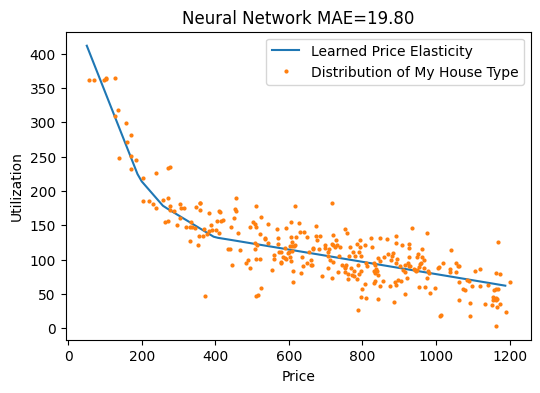

In [39]:
# Your answer goes here

my_house_y_NN=grid_NN.predict(my_house_x)


plt.figure(figsize=(6,4))
plt.plot(np.arange(50,1200,11.5),my_house_y_NN)
plt.plot((x_test_uti[my_apartment_comparable][:,0])*1150+50,y_test_uti[my_apartment_comparable],"o",markersize=2)
plt.title('Neural Network MAE=%.2f' %error_kernel_NN)
plt.xlabel("Price")
plt.ylabel("Utilization")
plt.legend(['Learned Price Elasticity', 'Distribution of My House Type'])


### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [186]:
# Your answer goes here


def Utilization_cal(price):
    price_norm=(price-50)/1150
    input_predict=[[price_norm,0,0,1,0,0,1,0,0,0,0,1,0,0]]
    return grid_NN.predict(input_predict)[0]


# assign data
mydata = [["Basline",baseline, Utilization_cal(baseline),baseline*Utilization_cal(baseline)],
          ["Decision tree",correspondence[proposed], Utilization_cal(correspondence[proposed]),correspondence[proposed]*Utilization_cal(correspondence[proposed])],
          ["Clustering",price_clustering, Utilization_cal(price_clustering),price_clustering*Utilization_cal(price_clustering)]]

head = ["","Proposed Price", "Corresponding Utilization","annually income"]
print(tabulate(mydata, headers=head, tablefmt="grid"))


+---------------+------------------+-----------------------------+-------------------+
|               |   Proposed Price |   Corresponding Utilization |   annually income |
+===============+==================+=============================+===================+
| Basline       |          625.464 |                     112.767 |           70531.5 |
+---------------+------------------+-----------------------------+-------------------+
| Decision tree |          700     |                     106.195 |           74336.8 |
+---------------+------------------+-----------------------------+-------------------+
| Clustering    |          650.54  |                     110.557 |           71922   |
+---------------+------------------+-----------------------------+-------------------+


_Answer:_

As we can see from the table above, from the perspective of annually income, the price proposed by decision tree would by a better choice, even though it has a lower utilization compared to the price proposed by clustering.

(We actually do not know what "utilization" exactly is, but from the dataset, we can get that the maximum utilization is 365 and the minimum utilization is 0, so we guess "utilization" is the average occupied days in one year, and further use the equation "annually income= proposed price * corresponding utilization" above)

# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

As we already discussed in the second part, the three methods we used (baseline, decision tree and clustering) may not be good ways to predict price. Maybe we can try other methods, e.g. neural networks or support vector regression. Moreover, some other descriptive features may be involved, e.g. does it has early-bird discount or length-of-stay discount, does the host normally response in a day, does the house include a kitchen or not.

Moreover, in the assignment we see the price as a constant, that is to say, the price does not change throughout a year. But, for example, if the house is near a beach or a ski resort, the price should change seasonally.
